## Question 3
### Average Tip Percentage For Credit Card Payments

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
extracted_files = glob.glob('..\\Data\\*\\*\\processed\\*.csv')
df = pd.DataFrame()
list_ = []
for fileName in extracted_files:
    short_df = pd.read_csv(fileName)
    list_.append(short_df)
df = pd.concat(list_)

In [3]:
len(df)

150774

In [3]:
df = df[df['payment_type'] == 1]

In [4]:
#Unsual scenario where tip amount is greater than actual fare.
df[df['tip_amount']>df['fare_amount']]

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
73,573,1,2016-01-01 00:07:06,2016-01-01 00:12:22,2,1.7,-73.999290,40.739094,1,N,...,7.0,0.5,0.5,20.00,0.0,0.3,28.30,2016-01-01,Manhattan,Manhattan
393,5393,1,2016-01-01 00:31:19,2016-01-01 00:34:30,1,0.3,-73.955360,40.768345,1,N,...,4.0,0.5,0.5,10.00,0.0,0.3,15.30,2016-01-01,Manhattan,Manhattan
477,5477,1,2016-01-01 00:31:42,2016-01-01 00:45:11,1,2.9,-73.933907,40.705597,1,N,...,11.0,0.5,0.5,15.00,0.0,0.3,27.30,2016-01-01,Brooklyn,Brooklyn
4,50004,1,2016-01-01 04:24:31,2016-01-01 04:34:17,1,1.9,-73.923309,40.867340,1,N,...,9.0,0.5,0.5,10.00,0.0,0.3,20.30,2016-01-01,Manhattan,Manhattan
182,50182,1,2016-01-01 04:26:09,2016-01-01 04:37:53,1,4.5,-74.007622,40.724632,1,N,...,14.5,0.5,0.5,34.00,0.0,0.3,49.80,2016-01-01,Manhattan,Not Specified
408,50408,1,2016-01-01 04:28:01,2016-01-01 04:33:50,1,0.9,-73.940750,40.791714,1,N,...,6.0,0.5,0.5,11.00,0.0,0.3,18.30,2016-01-01,Manhattan,Manhattan
151,50651,1,2016-01-01 04:30:00,2016-01-01 04:38:46,2,1.7,-73.992561,40.743019,1,N,...,8.0,0.5,0.5,10.00,0.0,0.3,19.30,2016-01-01,Manhattan,Manhattan
186,50686,1,2016-01-01 04:30:19,2016-01-01 05:21:42,3,12.3,-73.909615,40.653999,1,N,...,44.0,0.5,0.5,45.30,0.0,0.3,90.60,2016-01-01,Brooklyn,Manhattan
266,50766,1,2016-01-01 04:31:02,2016-01-01 04:40:22,1,2.2,-73.917732,40.840267,1,N,...,9.5,0.5,0.5,30.00,0.0,0.3,40.80,2016-01-01,Bronx,Manhattan
473,50973,1,2016-01-01 04:33:15,2016-01-01 04:33:21,1,3.6,-73.968597,40.755608,1,N,...,2.5,0.5,0.5,12.00,0.0,0.3,15.80,2016-01-01,Manhattan,Manhattan


In [5]:
#Unsual scenario where tip amount is greater than actual fare.
#Removing these outliars
df = df[df['tip_amount']<df['fare_amount']]

In [6]:
df.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.0,0.3,9.95,2016-01-01,Manhattan,Manhattan
5,5,1,2016-01-01 00:00:07,2016-01-01 00:20:35,2,4.9,-73.953033,40.672115,1,N,...,19.0,0.5,0.5,4.06,0.0,0.3,24.36,2016-01-01,Brooklyn,Manhattan
7,7,1,2016-01-01 00:00:09,2016-01-01 00:19:03,3,5.3,-73.997131,40.736961,1,N,...,18.0,0.5,0.5,3.85,0.0,0.3,23.15,2016-01-01,Manhattan,Queens


In [9]:
def calculateTipPercentage(total_amount, tip_amount):
    
    tip_percentage = 0
    if total_amount == 0 or tip_amount == 0:
        return tip_percentage
    
    tip_percentage = ((total_amount/(total_amount - tip_amount))*100)-100
    return tip_percentage

In [10]:
#Calculate tip percentage
df['tip_percentage'] =  df.apply(lambda row: calculateTipPercentage(row['total_amount'], row['tip_amount']), axis=1)

In [11]:
df.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area,tip_percentage
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,0.5,0.5,3.05,0.0,0.3,18.35,2016-01-01,Manhattan,Manhattan,19.934641
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,0.5,0.5,1.50,0.0,0.3,13.80,2016-01-01,Manhattan,Manhattan,12.195122
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,0.5,0.5,1.65,0.0,0.3,9.95,2016-01-01,Manhattan,Manhattan,19.879518
5,5,1,2016-01-01 00:00:07,2016-01-01 00:20:35,2,4.9,-73.953033,40.672115,1,N,...,0.5,0.5,4.06,0.0,0.3,24.36,2016-01-01,Brooklyn,Manhattan,20.000000
7,7,1,2016-01-01 00:00:09,2016-01-01 00:19:03,3,5.3,-73.997131,40.736961,1,N,...,0.5,0.5,3.85,0.0,0.3,23.15,2016-01-01,Manhattan,Queens,19.948187


In [72]:
df = df[df['pickup_area'] != 'Not Specified']
df = df[df['dropoff_area'] != 'Not Specified']
df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area,tip_percentage
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,0.5,0.5,3.05,0.00,0.3,18.35,2016-01-01,Manhattan,Manhattan,19.934641
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,0.5,0.5,1.50,0.00,0.3,13.80,2016-01-01,Manhattan,Manhattan,12.195122
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,0.5,0.5,1.65,0.00,0.3,9.95,2016-01-01,Manhattan,Manhattan,19.879518
5,5,1,2016-01-01 00:00:07,2016-01-01 00:20:35,2,4.9,-73.953033,40.672115,1,N,...,0.5,0.5,4.06,0.00,0.3,24.36,2016-01-01,Brooklyn,Manhattan,20.000000
7,7,1,2016-01-01 00:00:09,2016-01-01 00:19:03,3,5.3,-73.997131,40.736961,1,N,...,0.5,0.5,3.85,0.00,0.3,23.15,2016-01-01,Manhattan,Queens,19.948187
9,9,1,2016-01-01 00:00:14,2016-01-01 00:13:02,1,2.4,-73.995598,40.744240,1,N,...,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-01,Manhattan,Manhattan,24.796748
12,12,1,2016-01-01 00:00:17,2016-01-01 00:13:59,1,1.5,-74.002678,40.730637,1,N,...,0.5,0.5,3.35,0.00,0.3,14.65,2016-01-01,Manhattan,Manhattan,29.646018
17,17,1,2016-01-01 00:00:26,2016-01-01 00:07:41,1,1.3,-73.965881,40.688564,1,N,...,0.5,0.5,1.75,0.00,0.3,10.55,2016-01-01,Brooklyn,Brooklyn,19.886364
18,18,1,2016-01-01 00:00:27,2016-01-01 00:17:41,1,4.7,-73.995865,40.767773,1,N,...,0.5,0.5,2.00,0.00,0.3,20.30,2016-01-01,Manhattan,Manhattan,10.928962
19,19,1,2016-01-01 00:00:28,2016-01-01 00:22:51,1,15.4,-73.976501,40.733562,1,N,...,0.5,0.5,8.55,0.00,0.3,51.35,2016-01-01,Manhattan,Bronx,19.976636


In [73]:
grouped = df['tip_percentage'].groupby([df['dropoff_area']])

In [74]:
grouped.count()

dropoff_area
Bronx              619
Brooklyn          7214
Manhattan        65690
Queens            5002
Staten Island       17
Name: tip_percentage, dtype: int64

In [75]:
group_by_mean_df = grouped.mean().to_frame()
group_by_mean_df = group_by_mean_df.reset_index()
group_by_mean_df = group_by_mean_df.rename(columns = {'dropoff_area':'Dropoff Area', 'tip_percentage':'Average Tip'})

In [76]:
group_by_max_df = grouped.max().to_frame()
group_by_max_df = group_by_max_df.reset_index()
group_by_max_df = group_by_max_df.rename(columns = {'dropoff_area':'Dropoff Area', 'tip_percentage':'Max Tip'})

In [17]:
group_by_min_df = grouped.min().to_frame()
group_by_min_df = group_by_min_df.reset_index()
group_by_min_df = group_by_min_df.rename(columns = {'dropoff_area':'Dropoff Area', 'tip_percentage':'Min Tip'})

In [77]:
grouped_df = group_by_mean_df

In [78]:
grouped_df = pd.merge(grouped_df, group_by_max_df,how='inner', right_index=False, left_index=False)
grouped_df = pd.merge(grouped_df, group_by_min_df,how='inner', right_index=False, left_index=False)

In [79]:
max_lim = grouped_df['Max Tip'].max()

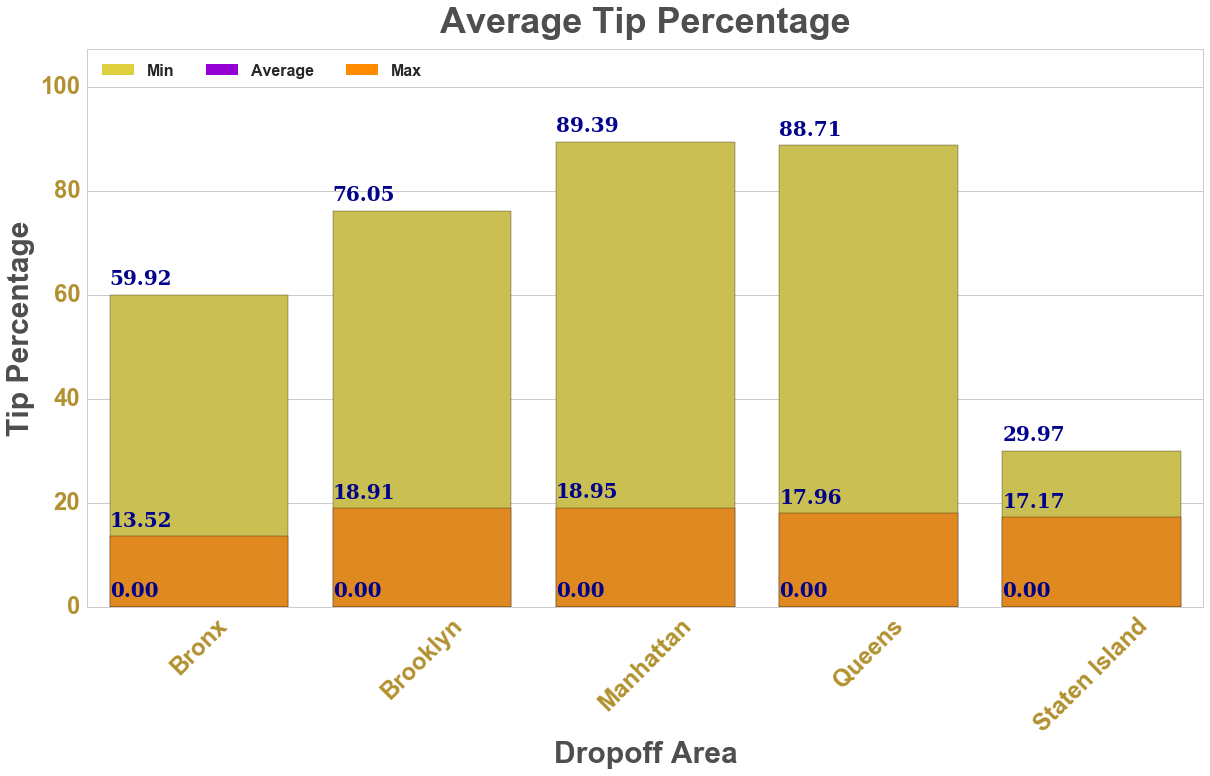

In [81]:
plt.subplots(figsize=(20,10))
sns.set(style='whitegrid')
max_plot = sns.barplot(x="Dropoff Area", y="Max Tip", data=grouped_df,
            label="Total", color="#DECF3F")

avg_plot = sns.barplot(x="Dropoff Area", y="Average Tip", data=grouped_df,
            label="Total", color="#FF8C00")

min_plot = sns.barplot(x="Dropoff Area", y="Min Tip", data=grouped_df,
            label="Total", color="#DECF3F")

#Legend
maxbar = plt.Rectangle((1,1),2,2,fc="#DECF3F", edgecolor = 'none')
avgbar = plt.Rectangle((1,1),2,2,fc='#9400D3',  edgecolor = 'none')
minbar = plt.Rectangle((1,1),2,2,fc='#FF8C00',  edgecolor = 'none')
l = plt.legend([maxbar, avgbar, minbar], ['Min', 'Average', 'Max'], loc=2, ncol = 3, prop={'size':16 , 'weight':'bold'})
l.draw_frame(False)

#title
avg_plot.set_title('Average Tip Percentage')
avg_plot.title.set_fontsize(36)
avg_plot.title.set_position([.5, 1.02])
avg_plot.title.set_fontweight(weight='bold')
avg_plot.title.set_color('#4D4D4D')

#XYAxis
avg_plot.xaxis.get_label().set_fontsize(30)
avg_plot.xaxis.get_label().set_fontweight(weight='bold')
avg_plot.xaxis.get_label().set_color('#4D4D4D')

avg_plot.yaxis.get_label().set_fontsize(30)
avg_plot.yaxis.get_label().set_fontweight(weight='bold')
avg_plot.yaxis.get_label().set_color('#4D4D4D')

#XyTicks
plt.setp(avg_plot.get_xticklabels(), rotation=45, fontsize=24, color='#B2912F', fontweight='bold')
plt.setp(avg_plot.get_yticklabels(), fontsize=24, color='#B2912F', fontweight='bold')

avg_plot.set(xlabel='Dropoff Area', ylabel='Tip Percentage')
avg_plot.set_ylim(0, 1.2*max_lim)

font ={'family': 'serif','color':'#00008B','weight': 'bold','size': 20}

for p in avg_plot.patches:
    percentage = p.get_height()
    avg_plot.text(p.get_x(), percentage+ 2, '%1.2f'%(percentage), fontdict= font)